# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [368]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [369]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

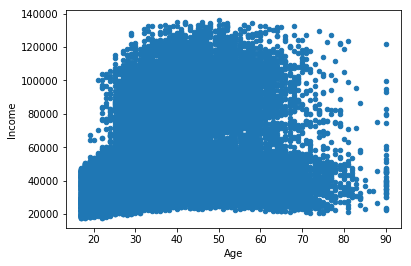

In [370]:
income.plot(x='Age', y='Income', kind='scatter')

In [371]:
# import
from sklearn.linear_model import LinearRegression
# fit a linear regression model
linreg = LinearRegression(fit_intercept=True)
Age = ['Age']
Income = ['Income']
X = income[Age]
y = income[Income]
# Fit
linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [372]:
# make predictions for all values of X
income['Inc_pred']= linreg.predict(X)
y_pred=income['Inc_pred']
#print(y_pre)

Text(0,0.5,'Income')

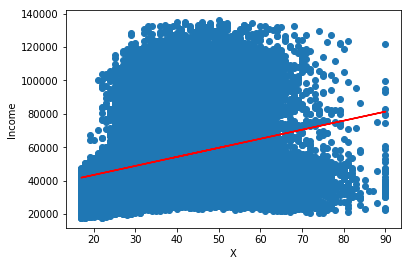

In [373]:
# put the plots together
plt.scatter(X, y)
plt.plot(X, income.Inc_pred, color='red')
plt.xlabel('X')
plt.ylabel('Income')

In [374]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2999.
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:13:43   Log-Likelihood:            -3.7510e+05
No. Observations:               32561   AIC:                         7.502e+05
Df Residuals:                   32559   BIC:                         7.502e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.254e+04    405.147     80.312      0.0

#### Conclusión por cada punto porcentual que se incrementa la edad se incrementa en 542.16 los ingresos,  sin embargo debemos resaltar que el ajuste del modelo es muy pobre, ya que su $$R^{2}$$ es igual a 8.4%

In [375]:
# compute prediction for Age=30 using the predict method
test = np.array(30)
test = test.reshape(-1,1)
#print(test)
Pronostic_30=linreg.predict(test)
print(Pronostic_30)

[[48803.11784304]]


#### Con una edad de 30 años se pronostica unos ingresos de 48803 dolares

In [376]:
# compute prediction for Age=40 using the predict method
test = np.array(40)
test = test.reshape(-1,1)
#print(test)
Pronostic_30=linreg.predict(test)
print(Pronostic_30)

[[54224.79441376]]


#### Con una edad de 40 años se pronostica unos ingresos de 54224 dolares

# Exercise 4.2
Evaluate the model using the MSE

In [9]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y, y_pred)
print(MSE)
from sklearn.metrics import r2_score
R2=round(r2_score(y, y_pred)*100,2)
print(R2)

593783043.8402297
8.43


#### El ajuste del modelo es muy bajo, la suma de cuadrados de error promedio es de 593783043 lo que tiene asociado un $$R^{2}$$ de 8.43%


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [27]:
# import
from sklearn.linear_model import LinearRegression
# fit a linear regression model
linreg = LinearRegression(fit_intercept=True)
income['Age2']=income['Age']**2
XM=income[['Age','Age2']].values
print(XM)

[[  39 1521]
 [  50 2500]
 [  38 1444]
 ...
 [  58 3364]
 [  22  484]
 [  52 2704]]


In [28]:
# Fit
linreg.fit(XM, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# make predictions for all values of X
income['Inc_pred2']= linreg.predict(XM)
y_pred2=income['Inc_pred2']
#print(y_pred2)

In [30]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(XM)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     3103.
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        07:47:22   Log-Likelihood:            -3.7369e+05
No. Observations:               32561   AIC:                         7.474e+05
Df Residuals:                   32558   BIC:                         7.474e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.623e+04    979.845    -16.559      0.0

#### Al incluit la variable de edad al cuadrado el ajuste del modelo mejora, sin embargo sigue siendo muy pobre el ajuste, de 8.4% pasa a 16%, al revisar la significancia de las variables encontramos que todas son significativas, sin embargo esto no garantiza que el modelo sea bueno.

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [13]:
income1=income
income1.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income',
       'Inc_pred', 'Age2', 'Inc_pred2'],
      dtype='object')

In [14]:
from array import *

Variables=income1.columns[[1,3,5,6,7,8,9,13]]
Variables_list = Variables.tolist()
print(Variables_list)

['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']


In [15]:
for Var in Variables_list:
    print(Var)
    # Creación de variables dummys
    Dummy = pd.get_dummies(income[Var])
    #print(Dummy)
    # tabla de frecuencia de clases de pasajeros
    Dummies=pd.value_counts(income[Var])
    Dummies_df=pd.DataFrame(Dummies)
    Dummies_df=Dummies_df.index
    #print(Dummies_df)
    #Dummies_list = Dummies.tolist()
    #print(Dummies_df[0])
    #print(Dummy.columns)
    Dummy = Dummy.drop(Dummies_df[0], 1)
    #print(Dummy.columns)
    income1 = pd.concat([income1, Dummy], axis=1, sort=False)
print(income1.columns)

Workclass
Education
Martial Status
Occupation
Relationship
Race
Sex
Country
Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       ...
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'Vietnam', 'Yugoslavia'],
      dtype='object', length=109)


In [16]:
Lista_var=income1.columns
print(Lista_var[0:20,])
print(Lista_var[20:40,])
print(Lista_var[40:60,])
print(Lista_var[60:80,])
print(Lista_var[80:100,])
print(Lista_var[100:120,])


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income',
       'Inc_pred', 'Age2', 'Inc_pred2', 'Federal-gov', 'Local-gov'],
      dtype='object')
Index(['Never-worked', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',
       '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'Masters',
       'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
Index(['Divorced', 'Married-AF-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
       'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family'],
    

In [18]:
XM=income1[['Age','Age2','fnlwgt','Capital Gain','Capital Loss','Hours per week',
           'Federal-gov', 'Local-gov','Never-worked', 'Self-emp-inc', 'Self-emp-not-inc', 
           'State-gov','Without-pay', '10th', '11th', '12th', '1st-4th', '5th-6th', 
           '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 
           'Masters', 'Preschool', 'Prof-school', 'Some-college','Divorced', 
           'Married-AF-spouse', 'Married-spouse-absent','Never-married', 'Separated', 
           'Widowed', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 
           'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
           'Priv-house-serv', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 
           'Not-in-family','Other-relative', 'Own-child', 'Unmarried', 'Wife','Amer-Indian-Eskimo', 
           'Asian-Pac-Islander', 'Black', 'Other', 'Female','Cambodia', 'Canada', 'China', 
           'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 
           'France', 'Germany','Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 
           'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica',
           'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
           'Philippines', 'Poland','Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 
           'Thailand', 'Trinadad&Tobago', 'Vietnam', 'Yugoslavia']].values
print(XM)

[[    39   1521  77516 ...      0      0      0]
 [    50   2500  83311 ...      0      0      0]
 [    38   1444 215646 ...      0      0      0]
 ...
 [    58   3364 151910 ...      0      0      0]
 [    22    484 201490 ...      0      0      0]
 [    52   2704 287927 ...      0      0      0]]


In [19]:
# import
from sklearn.linear_model import LinearRegression
# fit a linear regression model
linreg = LinearRegression(fit_intercept=True)


In [20]:
# Fit
linreg.fit(XM, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# make predictions for all values of X
income['Inc_pred3']= linreg.predict(XM)
y_pred3=income['Inc_pred3']
#print(y_pred2)

In [22]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(XM)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     419.1
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        07:24:13   Log-Likelihood:            -3.6332e+05
No. Observations:               32561   AIC:                         7.268e+05
Df Residuals:                   32463   BIC:                         7.277e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.11e+04   1044.068     20.208      0.0

#### Al incluir las variables categorias y cuantitativas mejora el modelo de manera importante, ya que el ajuste sube a 55%, sin embargo no todas las variables resultan significativas, por lo cual procedemos a excluir las variables que no esten aportanto significativamente 

In [23]:
# Exclusión de variables no significativas en el modelo de acuerdo al pvalue
XM=income1[['Age','Age2','fnlwgt','Capital Gain','Capital Loss','Hours per week',
           'Federal-gov', 'Self-emp-inc', 'Self-emp-not-inc', 
           'State-gov', '10th', '11th', '1st-4th', '5th-6th', 
           '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 
           'Masters', 'Preschool', 'Prof-school', 'Some-college','Divorced', 
           'Married-spouse-absent','Never-married', 'Separated', 
           'Widowed', 'Adm-clerical', 'Craft-repair', 'Exec-managerial', 
           'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
           'Protective-serv', 'Transport-moving', 
           'Not-in-family','Other-relative', 'Own-child', 'Unmarried', 'Wife','Amer-Indian-Eskimo', 
           'Black', 'Other', 'Female']].values
print(XM)

[[    39   1521  77516 ...      0      0      0]
 [    50   2500  83311 ...      0      0      0]
 [    38   1444 215646 ...      0      0      0]
 ...
 [    58   3364 151910 ...      0      0      1]
 [    22    484 201490 ...      0      0      0]
 [    52   2704 287927 ...      0      0      1]]


In [ ]:
# import
from sklearn.linear_model import LinearRegression
# fit a linear regression model
linreg = LinearRegression(fit_intercept=True)

In [24]:
# Fit
linreg.fit(XM, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# make predictions for all values of X
income['Inc_pred3']= linreg.predict(XM)
y_pred3=income['Inc_pred3']
#print(y_pred2)

In [26]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(XM)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     862.4
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        07:45:51   Log-Likelihood:            -3.6336e+05
No. Observations:               32561   AIC:                         7.268e+05
Df Residuals:                   32513   BIC:                         7.272e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.102e+04   1027.045     20.462      0.0

#### El excluir las variables no significativas no aporta mucho, en realidad el ajuste del modelo se mantiene, pero por principio de parsimonia es mejor trabajar con un modelo reducido.

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [190]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [191]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [192]:
data.shape

(3333, 21)

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [193]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [194]:
data=data.rename(columns={"Churn?":"Churn", "Int'l Plan":"Intl_Plan", "VMail Plan":"VMail_Plan"})
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl_Plan',
       'VMail_Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [195]:
Var=pd.value_counts(data["Churn"])
print(Var)

False.    2850
True.      483
Name: Churn, dtype: int64


[2850, 483]


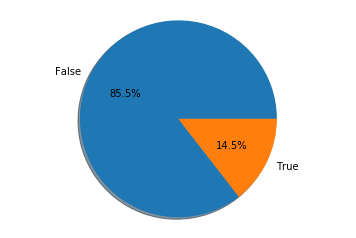

In [196]:
# pie chart of churners
labels = ['False', 'True']
sizes = [data["Churn"].value_counts()[0],
         data["Churn"].value_counts()[1]]
print(sizes) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### De la totalidad de los clientes, el 14.5% abandonan al operador, lo cual representa un % importante y una oportunidad de conseguir una eficiencia de costos

In [197]:
data["Churn_b"] = data.Churn.map({'False.':0, 'True.':1})
data["Intl_Plan"] = data.Intl_Plan.map({'yes':'yes_plan', 'no':'no_plan'})
data["VMail_Plan"] = data.VMail_Plan.map({'yes':'yes_mail', 'no':'no_mail'})
data.head()

,State,Account Length,Area Code,Phone,Intl_Plan,VMail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Churn_b
0,KS,128,415,382-4657,no_plan,yes_mail,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no_plan,yes_mail,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no_plan,no_mail,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes_plan,no_mail,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes_plan,no_mail,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


In [198]:
data1=data
data1.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl_Plan',
       'VMail_Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn', 'Churn_b'],
      dtype='object')

In [199]:
# Creación de variables X

from array import *

Variables=data1.columns[[0,2,4,5]]
Variables_list = Variables.tolist()
print(Variables_list)



['State', 'Area Code', 'Intl_Plan', 'VMail_Plan']


In [200]:
# Creación de variables dummys

for Var in Variables_list:
    print(Var)
    # Creación de variables dummys
    Dummy = pd.get_dummies(data[Var])
    #print(Dummy)
    # tabla de frecuencia de clases de pasajeros
    Dummies=pd.value_counts(data[Var])
    Dummies_df=pd.DataFrame(Dummies)
    Dummies_df=Dummies_df.index
    #print(Dummies_df)
    #Dummies_list = Dummies.tolist()
    #print(Dummies_df[0])
    #print(Dummy.columns)
    Dummy = Dummy.drop(Dummies_df[0], 1)
    #print(Dummy.columns)
    data1 = pd.concat([data1, Dummy], axis=1, sort=False)
print(data1.columns)

State
Area Code
Intl_Plan
VMail_Plan
Index([         'State', 'Account Length',      'Area Code',          'Phone',
            'Intl_Plan',     'VMail_Plan',  'VMail Message',       'Day Mins',
            'Day Calls',     'Day Charge',       'Eve Mins',      'Eve Calls',
           'Eve Charge',     'Night Mins',    'Night Calls',   'Night Charge',
            'Intl Mins',     'Intl Calls',    'Intl Charge', 'CustServ Calls',
                'Churn',        'Churn_b',             'AK',             'AL',
                   'AR',             'AZ',             'CA',             'CO',
                   'CT',             'DC',             'DE',             'FL',
                   'GA',             'HI',             'IA',             'ID',
                   'IL',             'IN',             'KS',             'KY',
                   'LA',             'MA',             'MD',             'ME',
                   'MI',             'MN',             'MO',             'MS',
               

In [201]:
data1=data1.rename(columns={408:"Area_Code1", 510:"Area_Code2"})
data1.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl_Plan',
       'VMail_Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn', 'Churn_b', 'AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WY', 'Area_Code1',
       'Area_Code2', 'yes_plan', 'yes_mail'],
      dtype='object')

In [222]:
# Creación de la matriz X

XM=data1[['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WY', 'Area_Code1',
       'Area_Code2', 'yes_plan', 'yes_mail']].values
print(XM)

[[128.   25.  265.1 ...   0.    0.    1. ]
 [107.   26.  161.6 ...   0.    0.    1. ]
 [137.    0.  243.4 ...   0.    0.    0. ]
 ...
 [ 28.    0.  180.8 ...   1.    0.    0. ]
 [184.    0.  213.8 ...   1.    1.    0. ]
 [ 74.   25.  234.4 ...   0.    0.    1. ]]


In [221]:
# Creación de la variable dicotomica y
y=data1["Churn_b"]
#print(y)

In [227]:
# Split the data in train (70%) and test (30%)

from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split(y, XM, test_size=0.3, random_state=0)

In [309]:
type(y_train)

pandas.core.series.Series

In [230]:
Size_train_df = pd.DataFrame(list(y_train.shape), columns=[1])
Size_test_df = pd.DataFrame(list(y_test.shape), columns=[1])
sizes = [Size_train_df.iloc[0,0],Size_test_df.iloc[0,0]]
print(sizes)
#print(Size_train_df.iloc[0])

[2333, 1000]


[2333, 1000]


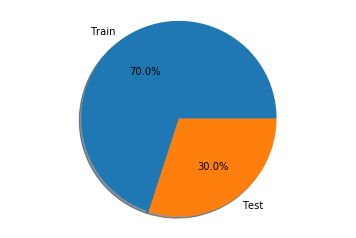

In [231]:
# pie chart of churners
labels = ['Train', 'Test']
sizes = [sizes[0],sizes[1]]
print(sizes) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### Se construyen dos conjuntos de datos, tanto para X como para y, con el proposito de modelar la regresión con el primer grupo de datos, que representa el 70% de la información y luego probar la precisión del modelo con el restante 30% de la información

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [340]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

y= pd.Series(y_train).values
print(y)

[0 0 0 ... 1 0 1]


In [344]:
type(y)

numpy.ndarray

In [347]:
print(X_train.shape)
data1.shape

(2333, 69)


(3333, 76)

In [345]:
logreg.fit(X_train, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [356]:
prediccion = logreg.predict(X_train)
logreg.score(X_train,y)

0.854

In [361]:
prediccion_test = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.854

#### El modelo de regresion logistica con el 70% de la información, genera un precisión de un 85.4% en la clasificación de los casos de retiro de los clientes

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [364]:
print(confusion_matrix(y_test, prediccion_test))

[[823  39]
 [107  31]]


In [365]:
print(accuracy_score(y_test, prediccion_test))

0.854


#### Los niveles de precisión se mantiene cuando aplicamos el modelo estimado al conjunto de validación

In [367]:
print(classification_report(y_test, prediccion_test))

             precision    recall  f1-score   support

          0       0.88      0.95      0.92       862
          1       0.44      0.22      0.30       138

avg / total       0.82      0.85      0.83      1000



### FIN